In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
from utils import *

#### Task

Постройте тематическую модель обращений в YouTrack от внешних пользователей в течение последних пяти релизов PyCharm. Визуализируйте её так, чтобы по визуализации можно было бы (хотя бы попытаться) ответить на два следующих вопроса:
1. Каковы основные причины для обращений в релизе 2020.2?
2. Какие новые проблемы добавились в релизе 2020.3 и какие ушли, по сравнению с релизом 2020.2?
Альтернативная, более сложная постановка: всё то же самое, но для проекта Kotlin, и данные вам придётся качать самим.


#### Dataset

In [4]:
df = pd.read_json('pycharm_issues.json', lines=True)

df

,idReadable,created,summary,description,Affected versions
0,PY-22135,1483471995465,"""Parameter foo unfilled"": false positives for ...","I'm getting false ""Incorrect call argument"" in...",[2016.3]
1,PY-22143,1483528763930,Python Extract Superclass: Incorrect Order of ...,"When extracting superclasses, if extractions i...",[2016.3]
2,PY-22145,1483545972098,Inspection does not report 'Unresolved Referen...,If a variable is deleted using the `del` state...,[2016.2]
3,PY-22149,1483572086024,ipython notebook clear_output() not working,"Below code should print only once ""Hellow Worl...",[]
4,PY-22128,1483387969625,False negative: no error for round brackets in...,I believe it's rather a common typo to use rou...,[2017.1]
...,...,...,...,...,...
22009,PY-51597,1636879129851,Intellij don't recognize python3 installed by ...,"\n\nIU-212.5457.46, JRE 11.0.12+7-b1504.40x64 ...",[]
22010,PY-51594,1636908525899,url tag in django template that uses filters o...,When using the {% url %} tag in a Django templ...,[]
22011,PY-51588,1636866008572,Variable incorrectly marked as used,"Hi, in this example, tha variable 'idocking' i...",[]
22012,PY-51595,1636912616563,Warn on invalid iterable unpack,```python\nimport time\n\ndef foo() -> float:\...,[2021.2]


In [5]:
get_unique_versions(df)

{'2016.1',
 '2016.2',
 '2016.3',
 '2017.1',
 '2017.2',
 '2017.3',
 '2018.1',
 '2018.2',
 '2018.3',
 '2019.1',
 '2019.2',
 '2019.3',
 '2020.1',
 '2020.2',
 '2020.3',
 '2021.1',
 '2021.2',
 '2021.3'}

In [6]:
new_df = preprocess_dataframe(df) # 2020.2 - 2021.3

new_df

,idReadable,created,summary,description,Affected versions
0,PY-22211,1484097590051,Running subprocesses with Popen inside unittes...,I have the following unittest:\n\n```\nclass M...,[2020.3]
1,PY-22248,1484322653638,Full project optimize imports alters library f...,Reported by: @matheusbrat on Twitter: https://...,[2020.2]
2,PY-22369,1485334537463,DataFrame auto-update doesn't work with action...,Consider this example:\n\n```python\nimport pa...,[2021.1]
3,PY-22469,1485863013851,PowerShell prompt doesn't show virtualenv,"Although the virtualenv seems activated, the p...",[2021.1]
4,PY-23007,1488923938785,Project requirements are not detected from set...,Since setuptools 30.3.0 it's possible to speci...,[2020.3]
...,...,...,...,...,...
2291,PY-51608,1636987696450,Breakpoints not always hit in multi-threaded app,# Steps to Reproduce\n\nCreate a project using...,[2021.2]
2292,PY-51621,1637063283050,code insighte: Quick solution (+error) instead...,"Hi,\n**What I do:**\nI open huge JSON file (ab...",[2021.2]
2293,PY-51614,1637012454711,"IDE keeps disabling Python plugin, I get and e...",Here is the job log.\n\nI am unable to use the...,[2021.2]
2294,PY-51605,1636977168955,"Better ""Invalid Python SDK"" handling",Quite often OS (usually macOS) or Python updat...,[2021.2]


#### Text processing

In [7]:
summary, description = get_texts(new_df) 

In [8]:
summary

0       [run, subprocesses, popen, inside, unittests, ...
1       [full, project, optimize, import, alters, libr...
2       [dataframe, autoupdate, work, action, resize, df]
3                  [powershell, prompt, show, virtualenv]
4               [project, requirement, detect, setup.cfg]
                              ...                        
2291       [breakpoints, always, hit, multithreaded, app]
2292    [code, insighte, quick, solution, error, inste...
2293    [ide, keep, disable, python, plugin, get, erro...
2294                 [well, invalid, python, sdk, handle]
2295                    [warn, invalid, iterable, unpack]
Name: summary, Length: 2296, dtype: object

In [9]:
description

0       [follow, unittest, timeout, equal, 2, executio...
1       [report, matheusbrat, twitter, http, //twitter...
2       [consider, example, cut, version, pycharm, 201...
3       [although, virtualenv, seem, activate, prompt,...
4       [since, setuptools, 30.3.0, 's, possible, spec...
                              ...                        
2291    [step, reproduce, create, project, use, code, ...
2292    [hi, open, huge, json, file, 150k, line, pycha...
2293    [job, log, unable, use, application, time, iu2...
2294    [quite, often, usually, macos, python, update,...
2295    [either, heuristic, type, check, think, pychar...
Name: description, Length: 2296, dtype: object

#### Topic count

description: 100%|██████████| 30/30 [01:01<00:00,  2.06s/it]


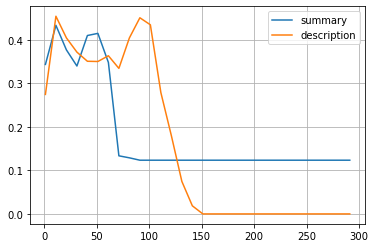

In [10]:
topic_cnt = range(1, 300, 10)
topic_cnt_grid_search(summary, description, topic_cnt)

- Будем использовать summary
- Примем количество тем равным 50

#### Models

In [12]:
model = Lda(summary, num_topics=50)

df_all_topics = topic_words_table(model)

df_all_topics.T

,0,1,2,3,4,5,6,7,8,9
topic: 0,import,module,false,eap,level,set,compatibility,recognize,error,type
topic: 1,slow,external,test,django,terminal,dockercompose,pycharm,open,doc,link
topic: 2,false,resolve,us,class,positive,operator,raise,exception,instal,negative
topic: 3,interpreter,ssh,change,project,configure,python,docker,configuration,compose,generator
topic: 4,python,requirements.txt,requirement,view,work,file,rerun,package,incorrect,builtin
topic: 5,self,numpy,high,number,refactor,handle,3.10,python,warn,incomplete
topic: 6,unpack,scratch,environment,keyword,render,rename,file,member,negative,google
topic: 7,syntax,annotation,highlight,walrus,report,operator,font,type,scientific,keyboard
topic: 8,connection,help,content,fails,package,requirements.txt,ide,instal,2021.2,wsl
topic: 9,rename,file,open,venv,multiline,ca,project,inspection,path,bug


#### Comparison

In [13]:
summary_2020_2, \
summary_2020_3 = get_unique_summary(summary, new_df)

prediction_2020_2 = model.predict_topics(summary_2020_2)
prediction_2020_3 = model.predict_topics(summary_2020_3)

only_2020_2, \
only_2020_3 = set_diff(prediction_2020_2, prediction_2020_3)

print(f"2020.2 only topics: {only_2020_2}")
print(f"2020.3 only topics: {only_2020_3}")

2020.2 only topics: {46, 43, 37, 22}
2020.3 only topics: {33, 28}


In [14]:
df_2020_2 = topic_words_table(model, topics=only_2020_2)

df_2020_2.T

,0,1,2,3,4,5,6,7,8,9
topic: 46,subclass,type,callable,recognize,dict,message,create,unexpected,super,error
topic: 43,popup,target,completion,unreachable,run,service,condition,keyword,drop,init
topic: 37,tool,wsl,error,window,condition,annotate,unable,behavior,escape,message
topic: 22,completion,folder,shadow,usage,code,work,without,content,update,unable


In [15]:
df_2020_3 = topic_words_table(model, topics=only_2020_3)

df_2020_3.T

,0,1,2,3,4,5,6,7,8,9
topic: 33,3.10,compatibility,reference,warn,inspection,attribute,cython,size,version,fails
topic: 28,type,parse,list,enum,error,load,parameter,current,git,cpu


#### Visualization

In [16]:
pyLDAvis.enable_notebook()

In [17]:
visualize_topics(model)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
27    -0.139403 -0.054265       1        1  3.362957
22    -0.093519 -0.036741       2        1  2.869565
18     0.137565  0.068347       3        1  2.790022
7      0.115440  0.021227       4        1  2.618079
2      0.157726 -0.095530       5        1  2.583088
21     0.087333 -0.097686       6        1  2.564312
3     -0.199100  0.102933       7        1  2.439491
11    -0.108839 -0.152275       8        1  2.436901
9     -0.068044  0.049558       9        1  2.432296
45    -0.010700 -0.042134      10        1  2.396056
28     0.074124 -0.042389      11        1  2.370385
15     0.040246  0.007058      12        1  2.370053
33    -0.007019 -0.006967      13        1  2.332840
47    -0.041555 -0.012093      14        1  2.332018
36    -0.059821 -0.062992      15        1  2.319610
30    -0.145613  0.018748      16        1  2.237668
26    -0.085288 -0.048333      17        1  2.220961
14     0.035914  0.075390      18        1  2.196474
20    -0.037538 -0.020893      19        1  2.181348
39     0.014166  0.037442      20        1  2.177505
1     -0.062587  0.042295      21        1  2.112955
6      0.031844 -0.017179      22        1  2.080121
49     0.056366 -0.136157      23        1  2.055257
42     0.058047 -0.154227      24        1  2.044966
44     0.025400 -0.010878      25        1  2.036634
4     -0.084629 -0.095085      26        1  1.946079
17     0.135395  0.054531      27        1  1.922112
40    -0.090122 -0.065410      28        1  1.911704
23    -0.131155  0.072138      29        1  1.887547
35     0.132700  0.108161      30        1  1.886223
37    -0.032503 -0.088607      31        1  1.869932
0      0.062487 -0.186881      32        1  1.862082
16    -0.027862  0.068111      33        1  1.854643
25    -0.112073  0.059458      34        1  1.807099
41    -0.064728  0.085908      35        1  1.761661
8     -0.015896 -0.036918      36        1  1.706865
24    -0.005783  0.087673      37        1  1.680272
48     0.048447 -0.174591      38        1  1.639379
12    -0.045926  0.022261      39        1  1.638073
19     0.039659  0.016836      40        1  1.608248
31    -0.056356  0.144147      41        1  1.541055
32     0.114851  0.074110      42        1  1.509673
38     0.035050  0.109458      43        1  1.500573
5     -0.057210  0.006803      44        1  1.486558
13     0.118055  0.085200      45        1  1.443059
10     0.009325  0.011195      46        1  1.413216
34     0.089140  0.066637      47        1  1.291047
46     0.149757  0.033980      48        1  1.276333
43    -0.013586  0.043563      49        1  1.001880
29     0.027817  0.065065      50        1  0.993121, topic_info=        Term       Freq      Total Category  logprob  loglift
99   support  28.000000  28.000000  Default  30.0000  30.0000
56      type  75.000000  75.000000  Default  29.0000  29.0000
6     import  53.000000  53.000000  Default  28.0000  28.0000
540     3.10  29.000000  29.000000  Default  27.0000  27.0000
97   generic  21.000000  21.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
2     inside   0.040944  14.528175  Topic50  -7.0849  -1.2596
3       long   0.040944   5.509395  Topic50  -7.0849  -0.2899
4        run   0.040944  36.882659  Topic50  -7.0849  -2.1912
5       file   0.040944  40.777400  Topic50  -7.0849  -2.2916
6     import   0.040944  53.906482  Topic50  -7.0849  -2.5707

[1998 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
289      14  0.273269     's
289      20  0.273269     's
289      27  0.182180     's
208       6  0.194975    ...
208      15  0.292462    ...
...     ...       ...    ...
231      28  0.120294    wsl
231      31  0.320783    wsl
231      36  0.120294    wsl
161      19  0.725840      x
95        6  0.794052  yield

[1079 rows x 3 columns], R=30, lambda_ste

In [18]:
visualize_topics(model, text=summary_2020_2)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
30    -0.145613 -0.018748       1        1  4.794207
38     0.035050 -0.109458       2        1  4.339840
18     0.137565 -0.068347       3        1  4.001468
2      0.157726  0.095530       4        1  3.485510
1     -0.062587 -0.042295       5        1  3.079107
15     0.040246 -0.007058       6        1  2.889939
21     0.087333  0.097686       7        1  2.865684
27    -0.139403  0.054265       8        1  2.788365
39     0.014166 -0.037442       9        1  2.779330
12    -0.045926 -0.022261      10        1  2.767509
24    -0.005783 -0.087673      11        1  2.746337
25    -0.112073 -0.059458      12        1  2.538430
40    -0.090122  0.065410      13        1  2.403095
14     0.035914 -0.075390      14        1  2.369905
23    -0.131155 -0.072138      15        1  2.262346
45    -0.010700  0.042134      16        1  2.198612
19     0.039659 -0.016836      17        1  2.151739
4     -0.084629  0.095085      18        1  2.124326
22    -0.093519  0.036741      19        1  2.096381
7      0.115440 -0.021227      20        1  2.028259
48     0.048447  0.174591      21        1  1.923496
6      0.031844  0.017179      22        1  1.891932
36    -0.059821  0.062992      23        1  1.852665
9     -0.068044 -0.049558      24        1  1.843051
29     0.027817 -0.065065      25        1  1.805567
16    -0.027862 -0.068111      26        1  1.782976
26    -0.085288  0.048333      27        1  1.716085
44     0.025400  0.010878      28        1  1.702317
37    -0.032503  0.088607      29        1  1.671688
41    -0.064728 -0.085908      30        1  1.601118
49     0.056366  0.136157      31        1  1.572005
17     0.135395 -0.054531      32        1  1.553920
47    -0.041555  0.012093      33        1  1.527771
35     0.132700 -0.108161      34        1  1.518931
5     -0.057210 -0.006803      35        1  1.510684
13     0.118055 -0.085200      36        1  1.440529
31    -0.056356 -0.144147      37        1  1.391160
11    -0.108839  0.152275      38        1  1.390224
42     0.058047  0.154227      39        1  1.343534
34     0.089140 -0.066637      40        1  1.329152
32     0.114851 -0.074110      41        1  1.280082
10     0.009325 -0.011195      42        1  1.191231
20    -0.037538  0.020893      43        1  1.187981
46     0.149757 -0.033980      44        1  1.162252
0      0.062487  0.186881      45        1  1.138414
8     -0.015896  0.036918      46        1  1.122233
43    -0.013586 -0.043563      47        1  1.107504
3     -0.199100 -0.102933      48        1  1.060696
33    -0.007019  0.006967      49        1  0.953702
28     0.074124  0.042389      50        1  0.716711, topic_info=          Term       Freq      Total Category  logprob  loglift
306      issue   9.000000   9.000000  Default  30.0000  30.0000
99     support   6.000000   6.000000  Default  29.0000  29.0000
97     generic   8.000000   8.000000  Default  28.0000  28.0000
56        type  16.000000  16.000000  Default  27.0000  27.0000
29         add  10.000000  10.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
16        show   0.143875   6.109432  Topic50  -4.0545   1.1896
135     create   0.094994   5.916533  Topic50  -4.4697   0.8066
241  incorrect   0.124556   8.887154  Topic50  -4.1987   0.6706
5         file   0.122474   8.753356  Topic50  -4.2156   0.6690
21     pycharm   0.152388  12.619921  Topic50  -3.9970   0.5216

[1978 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
289       9  0.392968     's
208       7  0.461619    ...
208      23  0.461619    ...
546      27  0.698268     10
540       6  0.202615   3.10
...     ...       ...    ...
231      23  0.197015    wsl
231      29  0.394030    wsl
231      33  0.197015    wsl
161      43  0.795827      x
95        7  1.024883  yield

[661 rows x 3 col

In [19]:
visualize_topics(model, text=summary_2020_3)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
39     0.014166  0.037442       1        1  5.935439
38     0.035050  0.109458       2        1  4.591515
18     0.137565  0.068347       3        1  4.448427
2      0.157726 -0.095530       4        1  3.833272
9     -0.068044  0.049558       5        1  3.576356
14     0.035914  0.075390       6        1  3.151789
19     0.039659  0.016836       7        1  3.127587
31    -0.056356  0.144147       8        1  3.110539
24    -0.005783  0.087673       9        1  3.105824
30    -0.145613  0.018748      10        1  2.986967
15     0.040246  0.007058      11        1  2.713572
27    -0.139403 -0.054265      12        1  2.560737
48     0.048447 -0.174591      13        1  2.496645
4     -0.084629 -0.095085      14        1  2.291907
21     0.087333 -0.097686      15        1  2.244672
41    -0.064728  0.085908      16        1  2.111494
47    -0.041555 -0.012093      17        1  2.100400
35     0.132700  0.108161      18        1  2.058680
32     0.114851  0.074110      19        1  1.999891
12    -0.045926  0.022261      20        1  1.908569
49     0.056366 -0.136157      21        1  1.858356
36    -0.059821 -0.062992      22        1  1.845879
44     0.025400 -0.010878      23        1  1.797414
45    -0.010700 -0.042134      24        1  1.761552
40    -0.090122 -0.065410      25        1  1.733059
26    -0.085288 -0.048333      26        1  1.649758
16    -0.027862  0.068111      27        1  1.641017
29     0.027817  0.065065      28        1  1.602858
34     0.089140  0.066637      29        1  1.498164
10     0.009325  0.011195      30        1  1.481017
5     -0.057210  0.006803      31        1  1.435021
22    -0.093519 -0.036741      32        1  1.422610
0      0.062487 -0.186881      33        1  1.367521
33    -0.007019 -0.006967      34        1  1.361653
1     -0.062587  0.042295      35        1  1.318834
17     0.135395  0.054531      36        1  1.316321
7      0.115440  0.021227      37        1  1.298919
8     -0.015896 -0.036918      38        1  1.259877
42     0.058047 -0.154227      39        1  1.229199
11    -0.108839 -0.152275      40        1  1.187821
20    -0.037538 -0.020893      41        1  1.153705
13     0.118055  0.085200      42        1  1.126290
6      0.031844 -0.017179      43        1  1.112290
23    -0.131155  0.072138      44        1  1.109148
37    -0.032503 -0.088607      45        1  1.003530
25    -0.112073  0.059458      46        1  0.996397
3     -0.199100  0.102933      47        1  0.829295
46     0.149757  0.033980      48        1  0.786194
43    -0.013586  0.043563      49        1  0.731010
28     0.074124 -0.042389      50        1  0.731010, topic_info=            Term       Freq      Total Category  logprob  loglift
415  refactoring   5.000000   5.000000  Default  30.0000  30.0000
99       support   4.000000   4.000000  Default  29.0000  29.0000
56          type  13.000000  13.000000  Default  28.0000  28.0000
43        string   7.000000   7.000000  Default  27.0000  27.0000
97       generic   5.000000   5.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
452          mac   0.007235   0.294858  Topic50  -6.8194   1.2110
16          show   0.114875   4.831759  Topic50  -4.0545   1.1794
241    incorrect   0.099450   7.216983  Topic50  -4.1987   0.6340
21       pycharm   0.121672  10.695875  Topic50  -3.9970   0.4422
5           file   0.097787   9.842730  Topic50  -4.2156   0.3068

[1980 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
289       1  0.672255       's
208      22  0.595483      ...
546      26  0.926987       10
540      11  0.237688     3.10
540      12  0.237688     3.10
...     ...       ...      ...
120      10  1.088024  wrongly
231      17  0.285674      wsl
231      22  0.285674      wsl
231      45  0.285674      wsl

#### Summary

to add